# Praktikum 5
# Netzplan

Aufgabe 1

Aufgabe 1
Frankfurt 0, Duisburg 1, München 2, Hamburg 3, Berlin 4, Dresden 5


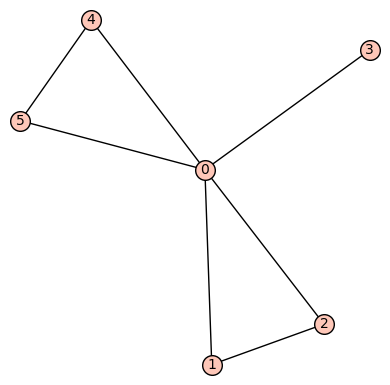

In [1]:

from sage.graphs.graph_plot import GraphPlot
print("Aufgabe 1")
print("Frankfurt 0, Duisburg 1, München 2, Hamburg 3, Berlin 4, Dresden 5")
fahrplan = Graph({ 1:[0,2], 2:[1,0],0:[3,4,1,2,5], 3:[0], 4:[5,0], 5:[4]}, loops=True)
fahrplan.show() 

Aufgabe 2
Adjazenzmatrix per Hand aufgestellt

In [5]:
from sage.repl.rich_output import get_display_manager
#Matrix per Hand aufgestellt print 1 mal mit und 1 mal ohne beschriftung 

print("Aufgabe")
adjazenzmatrixAufgabe2=matrix([[1,1,1,1,1,1],[1,1,1,0,0,0],[1,1,1,0,0,0],[1,0,0,1,0,0],[1,0,0,0,1,1],[1,0,0,0,1,1]])
print("Adjazenzmatrix: (Ohne Spalten und Zeilen beschriftung) ")
print(adjazenzmatrixAufgabe2)

print("\n\nAdjazenzmatrix: (Mit Spalten und Zeilen beschriftung) ")
print("Frankfurt 0, Duisburg 1, München 2, Hamburg 3, Berlin 4, Dresden 5")
T = table([[1,1,1,1,1,1],[1,1,1,0,0,0],[1,1,1,0,0,0],[1,0,0,1,0,0],[1,0,0,0,1,1],[1,0,0,0,1,1]], header_row=['0', '1', '2','3','4','5'],header_column=['','0', '1', '2','3','4','5'], frame=True,align='center' )
T

Aufgabe
Adjazenzmatrix: (Ohne Spalten und Zeilen beschriftung) 
[1 1 1 1 1 1]
[1 1 1 0 0 0]
[1 1 1 0 0 0]
[1 0 0 1 0 0]
[1 0 0 0 1 1]
[1 0 0 0 1 1]


Adjazenzmatrix: (Mit Spalten und Zeilen beschriftung) 
Frankfurt 0, Duisburg 1, München 2, Hamburg 3, Berlin 4, Dresden 5


,0,1,2,3,4,5
0,,,,,,
1,,,,,,
2,,,,,,
3,,,,,,
4,,,,,,
5,,,,,,


Aufgabe 3


In [7]:
import numpy as np
from operator import itemgetter
#Aufgabe 3

#Leere Matrix, wird später zu unserer adjazenzmatrix 
adjazenzmatrix=matrix([])

#row size
rows=0

#column size
column=0

#Hier Liste beliebig ändern
matrixAusAufgabeZweiAlsListe=[(0,1),(0,2),(0,3),(0,4),(0,5),(1,2),(4,5)]


#generateMatrix represntiert die umsetztung von Aufgabe 2 mit der man eine Liste eine adjazenzmatrix generieren kann 
#Generiert aus einer Liste eine adjazenzmatrix 
def generateMatrix(tmp):
    global adjazenzmatrix,rows,column
    A = np.zeros(shape=(max(tmp,key=itemgetter(1))[1]+1,max(tmp,key=itemgetter(1))[1]+1), dtype = int)
    i = 0
    for t in tmp:
        A[t[0], t[1]] = 1
        A[t[1], t[0]] = 1
        A[i, i] = 1
        if(i < max(tmp,key=itemgetter(1))[1]):
            i = i+1     
    adjazenzmatrix=A
    rows=len(np.argmax(adjazenzmatrix, axis=0))
    column=len(np.argmax(adjazenzmatrix, axis=0))

#Die folgenden drei Listen werden als Hashmap implementiert: 
#Integer -> [Liste]  der Integer gibt die Stadt an und die Liste voll mit Integern die Städte die zu erreichen sind

#direkte Nachbarn
firstHps ={}
#Nachbaren welche man mit einmal umsteigen erreichen kann
secondHps={}
#Nachbaren welche man mit zweimal umsteigen erreichen kann
thHps={}



#Inizialisiert die Hashmap -> mussten wir so machen da Sagemath sonst nicht wusste wie gemapt wird 
def iniziHashmaps():
    for d in range(rows):
        firstHps[d]=[1,2]
        firstHps[d].pop(0)
        firstHps[d].pop(0)
        secondHps[d]=[1,2]
        secondHps[d].pop(0)
        secondHps[d].pop(0)
        thHps[d]=[1,2]
        thHps[d].pop(0)
        thHps[d].pop(0)


#Löscht doppelte Elemente
def dubDeletOneHops():
    global secondHps,rows
    for d in range(rows):
        secondHps[d] = list(set(secondHps[d]))

#Löscht doppelte Elemente
def dubDeletTwoHops():
    global thHps,rows
    for d in range(rows):
        thHps[d] = list(set(thHps[d]))
        
        
        
        
        
#füllt die Hashmap firstHps mit den direkten nachbarn
def zeroHops():
    global rows,column,adjazenzmatrix
    for x in range(rows):
        for y in range(column):
            if(adjazenzmatrix[x][y]==1): 
                firstHps[x]=firstHps[x]+[y]
                
# füllt die Hashmap secondHps mit den nachbarn die mit einmal umsteigen erreichbar sind
# hierbei ist die Ausgangs Basis die Hashmap firstHps über die wir einmal über jedes Nachbar Stadt Iterieren und 
# dann in der firstHps nachschauen welche nachbarn die jeweilige Stadt haben
# diese Städte speichern wir dann in der Hashmap secondHps
def oneHops():
    global rows,column,secondHps,firstHps  
    for y in range(rows): 
         for c in range(len(firstHps[y])):
                value =firstHps[y][c]
                secondHps[y]= secondHps[y]+firstHps[value]
    dubDeletOneHops()

#füllt die Hashmap thHps mit den nachbarn die mit zweimal umsteigen erreichbar sind
#gleiches vorgehen wie bei oneHops mit dem unterschied ! das wir nicht firstHps als 
# ausgangspunkt nehmen sondern die Hashmap secondHps
def twoHops():
    global rows,column,secondHps,thHps  
    for y in range(rows): 
         for c in range(len(secondHps[y])):
                value =secondHps[y][c]
                thHps[y]= thHps[y]+secondHps[value]
    dubDeletTwoHops()
    
    
generateMatrix(matrixAusAufgabeZweiAlsListe)
iniziHashmaps()
zeroHops()
oneHops()
twoHops()

print("Hashmap firstHps -> zeigt die Stadt -> Liste von Nachbarn")
print(firstHps)
print("\n")
print("Hashmap secondHps -> zeigt die Stadt -> Liste von Städten welche mit einmal umsteigen erreibar sind")
print(secondHps)
print("\n")
print("Hashmap thHps -> zeigt die Stadt -> Liste von Städten welche mit zweimal umsteigen erreibar sind")
print(thHps)


Hashmap firstHps -> zeigt die Stadt -> Liste von Nachbarn
{0: [0, 1, 2, 3, 4, 5], 1: [0, 1, 2], 2: [0, 1, 2], 3: [0, 3], 4: [0, 4, 5], 5: [0, 4, 5]}


Hashmap secondHps -> zeigt die Stadt -> Liste von Städten welche mit einmal umsteigen erreibar sind
{0: [0, 1, 2, 3, 4, 5], 1: [0, 1, 2, 3, 4, 5], 2: [0, 1, 2, 3, 4, 5], 3: [0, 1, 2, 3, 4, 5], 4: [0, 1, 2, 3, 4, 5], 5: [0, 1, 2, 3, 4, 5]}


Hashmap thHps -> zeigt die Stadt -> Liste von Städten welche mit zweimal umsteigen erreibar sind
{0: [0, 1, 2, 3, 4, 5], 1: [0, 1, 2, 3, 4, 5], 2: [0, 1, 2, 3, 4, 5], 3: [0, 1, 2, 3, 4, 5], 4: [0, 1, 2, 3, 4, 5], 5: [0, 1, 2, 3, 4, 5]}


Aufgabe 4



In [8]:
#Aufgabe 4


#Die im Folgenden dargestelten Listen werden als Hashmap initsalisiert das <pair> ergibt sich aus zwei Integern welche für die Start Stadt und ZielStadt steht 
#Hashmap von <pair>->[List]
maxiHashmap={}
#Hashmap von <pair>->Integer
counterHashmap={}



#Printet ein Protokoll über die Maximalen umstiege zwischen Städten
def showUmsteige():
    global counterHashmap,rows
    for l in range(rows):
        for o in range(rows):
             print("Von Stadt :"+ str(l)+" nach Stadt: " + str(o) + "muss man maximal: " + str(counterHashmap[l,o]) +" mal umsteigen")
            
            
            
#inizialisiert eine Hashmap [<pair>]->[Liste]
def inzialMaxiHashMap():
    global maxiHashmap,rows
    for l in range(rows):
        for o in range(rows):
            maxiHashmap[l,o]=[1,2]
            maxiHashmap[l,o].pop(0)
            maxiHashmap[l,o].pop(0)

            
#inizialisiert eine Hashmap [<pair>]->Integer
def inzialCounterHashmap():
    global counterHashmap,rows
    for l in range(rows):
        for o in range(rows):
            counterHashmap[l,o]=0

# ruft die MEthode fWay mit allen möglichen Städte komibationen auf(start, ziel)
def lWay():
    for a in range(rows): 
        for b in range(column):
            fWay(a,a,b,liste=[],counter=0)


#s-> startwert (integer)
#v-> aktuell (integer) 
#g-> gesucht (integer)
#counter -> anzahl der gefahrenen stadtionen
#liste -> Liste mit bereits gefahreren Stadtionen 
#!Achtung -> wir haben uns dazu entschlossen das man keinen Ort doppelt besuchen soll das wenn man von 
#           Stadt 0 nach Stadt 0 fahren will garnicht umsteigen muss da man bereits in Stadt 0 ist 
#Methode geht jeden möglichen Weg einmal ab und speichert den maximalen Counter in der dafür vorgessehenen Hashmap
def fWay(s,v,g,liste,counter):
    global firstHps,counterHashmap,maxiHashmap
    if(s==g):
        counterHashmap[s,g]=counter
        maxiHashmap[s,g]=liste
        return
    if(v not in liste):
        liste.append(v)
    else: return
    counter=counter+1
    for c in range(len(firstHps[v])):
        value=firstHps[v][c]
        if(g==value):
            if(counter > counterHashmap[s,g]):
                counterHashmap[s,g]=counter
                maxiHashmap[s,g]=liste
        elif(g!=v):
            fWay(s,value,g,liste,counter)
        else: return

    
    

    
inzialMaxiHashMap()
inzialCounterHashmap()
lWay()
showUmsteige()


Von Stadt :0 nach Stadt: 0muss man maximal: 0 mal umsteigen
Von Stadt :0 nach Stadt: 1muss man maximal: 2 mal umsteigen
Von Stadt :0 nach Stadt: 2muss man maximal: 2 mal umsteigen
Von Stadt :0 nach Stadt: 3muss man maximal: 1 mal umsteigen
Von Stadt :0 nach Stadt: 4muss man maximal: 2 mal umsteigen
Von Stadt :0 nach Stadt: 5muss man maximal: 2 mal umsteigen
Von Stadt :1 nach Stadt: 0muss man maximal: 2 mal umsteigen
Von Stadt :1 nach Stadt: 1muss man maximal: 0 mal umsteigen
Von Stadt :1 nach Stadt: 2muss man maximal: 2 mal umsteigen
Von Stadt :1 nach Stadt: 3muss man maximal: 2 mal umsteigen
Von Stadt :1 nach Stadt: 4muss man maximal: 3 mal umsteigen
Von Stadt :1 nach Stadt: 5muss man maximal: 3 mal umsteigen
Von Stadt :2 nach Stadt: 0muss man maximal: 2 mal umsteigen
Von Stadt :2 nach Stadt: 1muss man maximal: 2 mal umsteigen
Von Stadt :2 nach Stadt: 2muss man maximal: 0 mal umsteigen
Von Stadt :2 nach Stadt: 3muss man maximal: 2 mal umsteigen
Von Stadt :2 nach Stadt: 4muss man maxim